# Final Project: Urban Air Pollution Predicted by Income and Racial Demographics


In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

import plotly.express as px 
import plotly.io as pio
pio.templates.default = "plotly_white"

#check against other studies, check p values 

In [2]:
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

## Part One: Cleaning Data

In [3]:
from dataCleaning import DatasetClass

ds = DatasetClass()

dataset = pd.read_csv("pollution_income_race.csv")

X_train, X_test, y_train, y_test = ds.train_test_data(dataset)

base_rate = y_test.mean()

base_rate

0.8605200945626478

In [4]:
X_train

,State Code,County Code,Date Local,Median Household Income,Total Pop,Total Male %,Total Female %,White Alone (M) %,White Alone (F) %,Black Alone (M) %,Black Alone (F) %,Am Indian+AK Native Alone (M) %,Am Indian+AK Native Alone (F) %,Asian Alone (M) %,Asian Alone (F) %,Nat. HI and PI (M) %,Nat. HI and PI (F) %,TOM_MALE
66,6,1,2002,113518.0,10021506,0.495390,0.504610,0.244432,0.238668,0.051896,0.056041,0.005613,0.005458,0.161241,0.171451,0.004578,0.004916,0.027631
835,32,3,2001,62496.0,13662646,0.500808,0.499192,0.349270,0.334776,0.065935,0.068644,0.006304,0.006135,0.048658,0.058518,0.004651,0.004758,0.025988
67,6,1,2003,113518.0,10021506,0.495390,0.504610,0.244432,0.238668,0.051896,0.056041,0.005613,0.005458,0.161241,0.171451,0.004578,0.004916,0.027631
447,6,95,2001,83678.0,2716962,0.501149,0.498851,0.300509,0.288954,0.074948,0.072824,0.006718,0.006442,0.076265,0.088328,0.005441,0.005261,0.037269
217,6,37,2012,75624.0,59665436,0.495714,0.504286,0.353743,0.349500,0.042930,0.046823,0.007591,0.007220,0.073381,0.082331,0.001828,0.001838,0.016241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,42,69,2002,56911.0,1294150,0.489517,0.510483,0.437606,0.461313,0.024152,0.021254,0.001740,0.001697,0.016049,0.016100,0.000323,0.000383,0.009646
1184,42,101,2005,55102.0,9562106,0.475856,0.524144,0.218985,0.226435,0.200090,0.235551,0.004473,0.004774,0.037813,0.041240,0.000867,0.000898,0.013629
1219,42,133,2000,71655.0,2743046,0.497499,0.502501,0.438321,0.443527,0.037588,0.036162,0.002079,0.001843,0.007190,0.008613,0.000395,0.000416,0.011926
924,36,103,2002,109084.0,9152726,0.495513,0.504487,0.416442,0.422438,0.043497,0.045976,0.003550,0.003241,0.021259,0.022082,0.000557,0.000519,0.010207


## Part Two: Determining Feature Importance

Feature importance determines how much each feature impacts the AQI when increased by one factor with all other features held constant. What we find below determining feature importance in our data set is that each feature has a relatively low impact on AQI. As we continue training models, however, it is clear that these features together have a significant impact on AQI as they can predict AQI outcome with remarkable accuracy.

In [5]:
from sklearn.ensemble import RandomForestClassifier

def feature_importance(X_train, y_train):
    """
    This function determines the feature importance of each feature in the dataset and sorts them
    by importance using Random Forest and Gini import.
    """
    
    RF = RandomForestClassifier()
    RF.fit(X_train, y_train)

    #get importance
    importances = pd.DataFrame(data = 
                               {'Attribute': X_train.columns,
                                'Importance': RF.feature_importances_
                               })

    importances.sort_values('Importance')
    
    return importances

importances = feature_importance(X_train, y_train)

Below we see the results of the first 10 most important features; Date Local is the feature with the most impact on the AQI, followed by Median Household Income, State Code, Total Male % and then Total Female %. However, it is important to note that most feature importances are below approximately .005.

Text(0.5, 1.0, 'Top 10 Features by Importance in Predicting AQI')

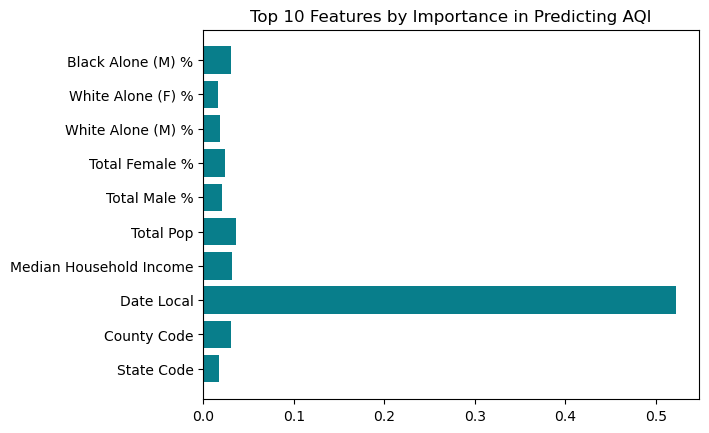

In [6]:
#plotting the importances in two batches

#first batch
importances10 = importances[0:10]
plt.barh(y=importances10['Attribute'], width=importances10['Importance'], color='#087E8B')
plt.title("Top 10 Features by Importance in Predicting AQI")

Below we see the results of the final 8 features and their importances, all of which have very miniscule feature importance values. However, the next most important features all have to do with racial and ethnic demographics.

Text(0.5, 1.0, '11th-18th Most Important Features in Predicting AQI')

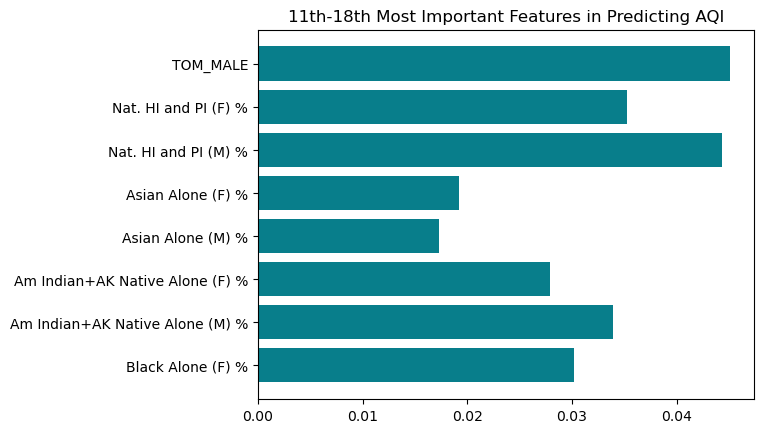

In [7]:
#second 8
importances20 = importances[10:18]
plt.barh(y=importances20['Attribute'], width=importances20['Importance'], color='#087E8B')
plt.title("11th-18th Most Important Features in Predicting AQI")

## Part Three: Looking at Accuracies of Different Models


### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression 

LR = LogisticRegression()
LR.fit(X_train, y_train)

print("Training Accuracy:")
print(LR.score(X_train, y_train))

print("Testing Accuracy:")
print(LR.score(X_test, y_test))



Training Accuracy:
0.8916083916083916
Testing Accuracy:
0.8605200945626478


### Logistic Regression with Polynomial Features: Including Coefficients


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def poly_LR(degree, **kwargs):
    plr = Pipeline([("poly", PolynomialFeatures(degree = degree)),
                    ("LR", LogisticRegression(**kwargs))])
    return plr

    
plr = poly_LR(degree = 2, max_iter = 1000000)
plr.fit(X_train, y_train)
print("Training accuracy")
print(plr.score(X_train, y_train))

print("Testing accuracy")
print(plr.score(X_test, y_test))

# check p values for statistical significance


Training accuracy
0.8916083916083916
Testing accuracy
0.8605200945626478


In [10]:
print("coefficients of model:")
print()
print(plr.named_steps['LR'].coef_)

print("biases of model:")
print(plr.named_steps['LR'].intercept_)

coefficients of model:

[[ 1.11276049e-23  2.70910398e-22  8.13314987e-22  2.23670684e-20
   8.26684574e-19  5.39082056e-17  5.49742047e-24  5.63018441e-24
   4.02195097e-24  4.05052126e-24  7.24190483e-25  7.90383926e-25
   1.21744623e-25  1.22740132e-25  4.17892468e-25  4.50642155e-25
   1.62466672e-26  1.60424146e-26  1.95395261e-25  9.71212566e-21
   2.50700099e-20  5.44539274e-19  1.86454545e-17  1.45297020e-15
   1.33430573e-22  1.37479824e-22  9.84446728e-23  9.97724228e-23
   1.94709841e-23  2.14792962e-23  3.46827391e-24  3.52705503e-24
   7.51825966e-24  8.05513764e-24  3.01250434e-25  2.97962788e-25
   4.22713223e-24  1.43266830e-19  1.63502000e-18  5.78155511e-17
   4.15345765e-15  4.01429417e-22  4.11885570e-22  2.88552987e-22
   2.89759055e-22  6.61993339e-23  7.31387587e-23  6.18024253e-24
   6.09656620e-24  2.60848784e-23  2.81342168e-23  9.93723991e-25
   9.77824669e-25  1.34182512e-23  4.49591622e-17  1.66155303e-15
   1.08558323e-13  1.10500506e-20  1.13170178e-20  8

### Support Vector Machine

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(gamma = "auto") 
svc.fit(X_train, y_train)

print("Training Accuracy:")
print(svc.score(X_train, y_train))

print("Test accuracy")
print(svc.score(X_test, y_test))

Training Accuracy:
0.9463869463869464
Test accuracy
0.9054373522458629


In [12]:
best_score = -np.inf
best_gamma = np.inf

for gammas in 6**(np.arange(-4,4, dtype = float)):
    svc = SVC(gamma = gammas)
    scores = cross_val_score(svc, X_train, y_train,cv=8)
    if scores.mean()>best_score:
        best_score = scores.mean()
        best_gamma = gammas
        
print(best_score, best_gamma)

0.9114096573208723 0.027777777777777776


In [13]:
svc_model = SVC(gamma = .027777777777777776)
svc_model.fit(X_train,y_train)

print("training accuracy")
print(svc_model.score(X_train,y_train))
print("testing")
print(svc_model.score(X_test,y_test))

training accuracy
0.9358974358974359
testing
0.9054373522458629


### Decision Tree Classifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

best_score = -np.inf
maximum = 0

for depth in range(2,25):
    tree = DecisionTreeClassifier(max_depth = depth)
    #scores = cross_val_score(tree, X_train[subset], y_train, cv = 11)

    scores = cross_val_score(tree, X_train, y_train, cv = 9)
    if scores.mean() > best_score:
        best_score = scores.mean()
        maximum = depth
print(best_score, maximum)

0.8996954191033139 5


In [15]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train,y_train)
print("training")
print(tree.score(X_train,y_train))
print("testing")
print(tree.score(X_test,y_test))

training
0.9335664335664335
testing
0.900709219858156


## Part 4: Visualization of Data

First, let’s explore our data a bit by visualizing the AQI, Median Income, and some racial demographics using maps. (might want this at the begninng of the blog post)

In [16]:
import pandas as pd

df = pd.read_csv("pollution_income_race.csv")
df = df.dropna()

from geomapping import Mapping
mp = Mapping()
mp.plot_df(df,"AQI Total")

In [17]:
mp.plot_df(df, "Median Household Income")

In [33]:
mp.plot_df(df, "black_alone_percent")

## Our testing data

Next, let’s visualize our binary predictions compared to the actual AQI (want to label these, zoom, etc)

In [19]:
#creating dataframe with test data, labels, and predictions
from copy import deepcopy
test_combined = deepcopy(X_test)

test_combined["Predicted AQI Binary"] = svc_model.predict(X_test)
test_combined["Actual AQI Binary"] = y_test
X_test.head()
#plotting predictions

mp.plot_df(test_combined, "Predicted AQI Binary")

In [20]:
# #plotting actual 
mp.plot_df(test_combined, "Actual AQI Binary")

## Part 5: Analysis

The overall accuracy of the model was 0.9054373522458629

To find the PPV of our model we first need to calculate the number of true positives and false positives. To do so, we compare the predicted labels to the test labels. If the predicted label is 1 and the acutal label is 1, then that is a true positive. If the predicted label is 1 and the true label is 0 that is a false positive.

In [21]:
TP = len((np.where((test_combined["Predicted AQI Binary"]==1) & (test_combined["Actual AQI Binary"]==1))[0]))
FP = len((np.where((test_combined["Predicted AQI Binary"]==1) & (test_combined["Actual AQI Binary"]==0))[0]))
PPV = round((TP)/(TP+FP),4)
print("The positive predictive value of this model is: " + str(PPV))

The positive predictive value of this model is: 0.9112


The FPR represents the rate at which a test label of 0 is incorrectly predicted to be 1; or, when a high risk county is predicted to be a low risk count.

The FNR represents the rate at which a test label of 1 is incorrectly predicted to be 0.

In [22]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_combined["Actual AQI Binary"],test_combined["Predicted AQI Binary"], normalize = 'true')
print("FPR = " + str(conf_matrix[0][1]))
print("FNR = " + str(conf_matrix[1][0])) 

FPR = 0.5932203389830508
FNR = 0.013736263736263736


## By Group Metrics: Income

First we will divide the data set into high income and low income counties. Counties where the median household incomw is more than $73,125 (mean) will be marked as high income (1) and under this threshold will be marked a lower income (0)

In [23]:
test_combined.loc[test_combined["Median Household Income"] <=73125,"High Income"]=0
test_combined.loc[test_combined["Median Household Income"] >73125,"High Income"]=1
medIncome = test_combined["High Income"]

In [24]:
print("The accuracy for high income counties is " + str((test_combined["Predicted AQI Binary"]==test_combined["Actual AQI Binary"])[medIncome==1].mean().round(4)))
print("The accuracy for low income counties is " + str((test_combined["Predicted AQI Binary"]==test_combined["Actual AQI Binary"])[medIncome==0].mean().round(4)))

The accuracy for high income counties is 0.9653
The accuracy for low income counties is 0.864


Now we will compare some of the accuracy metrics such as the false positive rate and the false negative rate. Ideally, the values for each group will be about equal.



In [25]:
conf_matrix_high_norm = confusion_matrix(test_combined["Actual AQI Binary"][medIncome==1],test_combined["Predicted AQI Binary"][medIncome==1], normalize = 'true')
print("FPR for high income counties = " + str(conf_matrix_high_norm[0][1].round(4) * 100))
print("FNR for high income counties = " + str(conf_matrix_high_norm[1][0].round(4) *100)) 

conf_matrix_low_norm = confusion_matrix(test_combined["Actual AQI Binary"][medIncome==0],test_combined["Predicted AQI Binary"][medIncome==0], normalize = 'true')
print("FPR for low income counties = " + str(conf_matrix_low_norm[0][1].round(4) *100))
print("FNR for low income counties = " + str(conf_matrix_low_norm[1][0].round(4) *100))

FPR for high income counties = 50.0
FNR for high income counties = 0.61
FPR for low income counties = 61.22
FNR for low income counties = 1.9900000000000002


## Bias measures for income

Calibration means that the fraction of predicted counties to have a AQI binary score of 1 (low risk) is the same across all income groups. So we will calculate this metric for both income groups. This metric can be calculated by dividing the number of true positives by the total number of predicted positives.

In [26]:

high_income_calibration = confusion_matrix(test_combined["Actual AQI Binary"][medIncome==1],test_combined["Predicted AQI Binary"][medIncome==1])[0][0]/(confusion_matrix(test_combined["Actual AQI Binary"][medIncome==1],test_combined["Predicted AQI Binary"][medIncome==1])[0].sum())
low_income_calibration = confusion_matrix(test_combined["Actual AQI Binary"][medIncome==0],test_combined["Predicted AQI Binary"][medIncome==0])[0][0]/(confusion_matrix(test_combined["Actual AQI Binary"][medIncome==0],test_combined["Predicted AQI Binary"][medIncome==0])[0].sum())

print("The percentage of high income counties predicted to have a low risk AQI who actually had a low risk AQI is " + str(high_income_calibration.round(4)*100))
print("The percentage of low income counties predicted to have a low risk AQI who actually had a low risk AQI is " + str(low_income_calibration.round(4)*100))




The percentage of high income counties predicted to have a low risk AQI who actually had a low risk AQI is 50.0
The percentage of low income counties predicted to have a low risk AQI who actually had a low risk AQI is 38.78


This model is not calibrated as the percentages are very different. There is a 11.2% difference

A model satisfies error rate balance if the false positive and false negative rates are equal across groups. Looking at the previously calculated FPR anf FNR, I would say that this model does not satisfy error rate balance. The FPR for high income counties is 50%, while the FPR for low income counties is 61.22%. The difference between the two rates is 10.1%. In general, the high FPR may stem from a lack of positive observation in the training data itself.

A model satisifes statistical parity if the proportion of counties classified as having a low risk AQI is the same for each group. So we compare the total number of predicted positives.

In [27]:
print("The proportion of low income counties classified as having a low risk AQI is " + str((confusion_matrix(test_combined["Actual AQI Binary"][medIncome==0],test_combined["Actual AQI Binary"][medIncome==0])[0].sum())/(medIncome==0).sum()))
print("The proportion of high income counties classified as having a low risk AQI is " + str((confusion_matrix(test_combined["Actual AQI Binary"][medIncome==1],test_combined["Actual AQI Binary"][medIncome==1])[0].sum())/(medIncome==1).sum()))



The proportion of low income counties classified as having a low risk AQI is 0.196
The proportion of high income counties classified as having a low risk AQI is 0.057803468208092484


This model does not satisfy statistical parity. The proportion of counties predictied to have a low risk AQI is not the same for low and high income areas. The is a 14% difference between the two groups.

## By Group Measures: Race

The data set will first be split into two halves. One set of counties is designated (1), where white people make up the majority of its residents. Additionally, counties without a significant white majority are denoted with a 0.

In [28]:
test_combined.loc[(test_combined["White Alone (M) %"]+test_combined["White Alone (F) %"])<=.50,"Majority White"]=0
test_combined.loc[(test_combined["White Alone (M) %"]+test_combined["White Alone (F) %"])>.50,"Majority White"]=1

majority_white = test_combined["Majority White"]
                                                 
                                                 

In [29]:
print("The accuracy for counties with a white majority population is " + str((test_combined["Predicted AQI Binary"]==test_combined["Actual AQI Binary"])[majority_white==1].mean().round(4)))
print("The accuracy for counties without a white majority population is " + str((test_combined["Predicted AQI Binary"]==test_combined["Actual AQI Binary"])[majority_white==0].mean().round(4)))

The accuracy for counties with a white majority population is 0.9122
The accuracy for counties without a white majority population is 0.8511


Now we will compare some of the accuracy metrics such as the false positive rate and the false negative rate. Ideally the metrics will be about equal across the different demographic groups

In [30]:
conf_matrix_major_white_norm = confusion_matrix(test_combined["Actual AQI Binary"][majority_white==1],test_combined["Predicted AQI Binary"][majority_white==1], normalize = 'true')
print("FPR for counties with a majority white population = " + str(conf_matrix_major_white_norm[0][1].round(4) ))
print("FNR for counties with a majority white population = " + str(conf_matrix_major_white_norm[1][0].round(4))) 

conf_matrix_nonmajor_white_norm = confusion_matrix(test_combined["Actual AQI Binary"][majority_white==0],test_combined["Predicted AQI Binary"][majority_white==0], normalize = 'true')
print("FPR for counties without a majority white population = " + str(conf_matrix_low_norm[0][1].round(4)))
print("FNR for counties without a majority white population = " + str(conf_matrix_low_norm[1][0].round(4)))

FPR for counties with a majority white population = 0.58
FNR for counties with a majority white population = 0.0123
FPR for counties without a majority white population = 0.6122
FNR for counties without a majority white population = 0.0199


## Bias measures for race

Calibration means that the fraction of predicted counties to have a AQI binary score of 1 (low risk) is the same across all demographic groups. So we will calculate this metric for both demographics groups. This metric can be calculated by dividing the number of true positives by the total number of predicted positives.

In [31]:
majority_calibration = confusion_matrix(test_combined["Actual AQI Binary"][majority_white==1],test_combined["Predicted AQI Binary"][majority_white==1])[0][0]/(confusion_matrix(test_combined["Actual AQI Binary"][majority_white==1],test_combined["Predicted AQI Binary"][majority_white==1])[0].sum())
nonmajority_calibration = confusion_matrix(test_combined["Actual AQI Binary"][majority_white==0],test_combined["Predicted AQI Binary"][majority_white==0])[0][0]/(confusion_matrix(test_combined["Actual AQI Binary"][majority_white==0],test_combined["Predicted AQI Binary"][majority_white==0])[0].sum())

print("The percentage of counties without a majority white population predicted have a low risk AQI who actually had a low risk AQI is " + str(nonmajority_calibration.round(4)*100))
print("The percentage of counties with a majority white population predicted have a low risk AQI who actually had a low risk AQI is " + str(majority_calibration.round(4)*100))


The percentage of counties without a majority white population predicted have a low risk AQI who actually had a low risk AQI is 33.33
The percentage of counties with a majority white population predicted have a low risk AQI who actually had a low risk AQI is 42.0


This model is not calibrated as the percentages are very different. There is a 9% difference

A model satisfies error rate balance if the false positive and false negative rates are equal across groups. Looking at the previously calculated FPR anf FNR, I would say that this model does not satisfy error rate balance. The FPR for counties with a majority white population is 58%, while the FPR for counties without a majority white population is 61%.

A model satisifes statistical parity if the proportion of counties classified as having a low risk AQI is the same for each group. So we compare the total number of predicted positives.



In [32]:
print("The proportion of counties with a majority white population classified as having a low risk AQI is " + str((confusion_matrix(test_combined["Actual AQI Binary"][majority_white==1],test_combined["Actual AQI Binary"][majority_white==1])[0].sum())/(majority_white==1).sum()))
print("The proportion of counties without a majority white population classified as having a low risk AQI is " + str((confusion_matrix(test_combined["Actual AQI Binary"][majority_white==0],test_combined["Actual AQI Binary"][majority_white==0])[0].sum())/(majority_white==0).sum()))

The proportion of counties with a majority white population classified as having a low risk AQI is 0.13297872340425532
The proportion of counties without a majority white population classified as having a low risk AQI is 0.19148936170212766


These values are roughly the same, so I would say that this model satisfies statistical parity.